In [1]:
import numpy as np

In [2]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 4 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally u

In [3]:
dbname = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/minion_1016_desc_dithered_v4.db'

In [6]:
ObsMetaData = ObservationMetaDataGenerator(database=dbname)

In [4]:
# We want to select based on dithered RA and DEC ... there is no way to accesss the place where these are. Tried fooling it but does not quite work
# ObsMetaData.user_interface_to_opsim['fieldDec'] = ('descDitheredDec', None, float)
# ObsMetaData.user_interface_to_opsim['fieldRA'] = ('descDitheredRA', None, float)

In [5]:
# Select based on a larger range and then trim down

In [9]:
len(res)

803

In [15]:
res = ObsMetaData.getObservationMetaData(boundLength=2, boundType='circle', fieldRA=(50, 64.), fieldDec=(-36., -28), expMJD=(59215, 59945))

In [16]:
from collections import OrderedDict as Odict

In [17]:
import pandas as pd

In [18]:
# Keep desired filters

In [19]:
df = pd.DataFrame(list(Odict(obsmd.summary['OpsimMetaData']) for obsmd in res if obsmd.bandpass in ("g", "r", "i", "z")))

In [20]:
from lsst.sims.utils import angularSeparation

In [21]:
X = df[['obsHistID', 'filter', 'FWHMeff', 'descDitheredRA', 'descDitheredDec', 'airmass', 'fiveSigmaDepth']]

In [22]:
X.descDitheredRA = np.degrees(X.descDitheredRA)
X.descDitheredDec = np.degrees(X.descDitheredDec)

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
# Make sure the corners are in

In [36]:
X['d1'] = angularSeparation(56, -31, X.descDitheredRA.values, X.descDitheredDec.values)
X['d2'] = angularSeparation(56, -32, X.descDitheredRA.values, X.descDitheredDec.values)
X['d3'] = angularSeparation(58, -31, X.descDitheredRA.values, X.descDitheredDec.values)
X['d4'] = angularSeparation(58, -32, X.descDitheredRA.values, X.descDitheredDec.values)

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: S

In [38]:
X.head()

,obsHistID,filter,FWHMeff,descDitheredRA,descDitheredDec,airmass,fiveSigmaDepth,d1,d2,d3,d4
0,4324,z,1.185419,62.236003,-30.045620,1.020370,22.467843,5.455183,5.689013,3.771459,4.122247
1,4354,z,0.933524,63.911262,-28.365823,1.008200,23.064965,7.358266,7.741093,5.770457,6.268510
2,6824,i,0.895988,64.399624,-32.100018,1.303959,23.657651,7.240085,7.118300,5.562552,5.424353
3,6825,i,0.920723,60.720838,-32.441959,1.363864,23.601620,4.266169,4.017858,2.726680,2.343795
4,6826,i,0.948814,57.488219,-29.828928,1.433173,23.547951,1.737364,2.518597,1.251475,2.215015


In [26]:
# Keep the cases which have at least one of these poaints in the focal radius

In [39]:
Y = X.query('d1 < 1.75 | d2 < 1.75 | d3 < 1.75 |d4 < 1.75')#.obsHistID.size

In [41]:
len(Y)

129

In [40]:
Y.head()

,obsHistID,filter,FWHMeff,descDitheredRA,descDitheredDec,airmass,fiveSigmaDepth,d1,d2,d3,d4
4,6826,i,0.948814,57.488219,-29.828928,1.433173,23.547951,1.737364,2.518597,1.251475,2.215015
6,6855,i,0.904759,59.717574,-32.698014,1.466872,23.582997,3.585079,3.217060,2.238636,1.610144
9,8004,z,0.769287,54.321783,-32.574026,1.028873,23.111168,2.124184,1.530438,3.500070,3.161864
12,8007,z,0.766362,58.658516,-31.065829,1.022500,23.110615,2.278903,2.450868,0.568090,1.089814
18,8048,z,0.839227,59.614086,-31.980671,1.039195,23.011508,3.233892,3.065160,1.689969,1.369090


In [42]:
Y.to_csv('pointings_in_range.csv', index=False)

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Seeing')

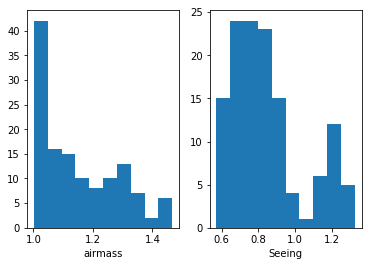

In [46]:
fig, ax = plt.subplots(1, 2)
_ = ax[0].hist(Y.airmass)
_ = ax[1].hist(Y.FWHMeff)
ax[0].set_xlabel('airmass')
ax[1].set_xlabel('Seeing')

Should have done this with OpSimSummary instead ... next time.